In [67]:
import pandas as pd
import networkx as nx

# Freundschaftsdaten laden
friends_df = pd.read_csv('friends.csv', delimiter=',', header=None, comment='#', on_bad_lines='skip')
friends_df = friends_df.dropna()
# Netzwerk erstellen
G = nx.Graph()
G.add_edges_from(friends_df.values)
print(f"Netzwerk erstellt: {G.number_of_nodes()} Knoten, {G.number_of_edges()} Kanten")

# Validierung
print("Erste 5 Freundschaftsverbindungen:")
print(friends_df.head())
print("Letzte 5 Freundschaftsverbindungen:")
print(friends_df.tail())


Netzwerk erstellt: 8311 Knoten, 55483 Kanten
Erste 5 Freundschaftsverbindungen:
     0     1
0  360  4719
1  360  4720
2  360  4721
3  360  4722
4  360    14
Letzte 5 Freundschaftsverbindungen:
          0     1
55478  3926  6433
55479  2970  2922
55480  7793   581
55481  3329   241
55482  5117  4718


In [68]:
import json

# Präferenzdaten laden
with open('preferences.json', 'r') as f:
    preferences_dict = json.load(f)

# Präferenzdaten in DataFrame umwandeln
preferences_df = pd.DataFrame.from_dict(preferences_dict, orient='index', columns=['preferences'])
preferences_df['preferences'] = preferences_df['preferences'].apply(lambda x: [int(bit) for bit in x])

# Index in Integer umwandeln
preferences_df.index = preferences_df.index.astype(int)

# Überprüfen, ob Benutzer 0 jetzt im Index ist
print(f"Präferenzdaten geladen: {len(preferences_df)} Benutzer")
print("Erste Zeilen der Präferenz-DataFrame:")
print(preferences_df.head())

if 0 in preferences_df.index:
    print("Beispielpräferenzen für Benutzer 0:")
    print(preferences_df.loc[0, 'preferences'])
else:
    print("Benutzer 0 nicht im Index. Verfügbare IDs:")
    print(preferences_df.index[:5].tolist())


Präferenzdaten geladen: 8311 Benutzer
Erste Zeilen der Präferenz-DataFrame:
                                         preferences
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
Beispielpräferenzen für Benutzer 0:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [69]:
# Genres laden
with open('preferences_description.txt', 'r') as f:
    genres = [line.strip() for line in f.readlines() if not line.startswith("#")]
print(f"Genres geladen: {len(genres)} Genres")
print("Erste Genres:", genres[:5])

# Konzertdaten laden
concerts_df = pd.read_csv('n_concerts.txt', delimiter=":", header=None, engine='python', comment='#')
concerts_df.columns = ['Genre', 'Anzahl']
concerts_df['Anzahl'] = concerts_df['Anzahl'].astype(int)

# Hochrisiko-Genres definieren
threshold = 24
high_risk_genres = concerts_df[concerts_df['Anzahl'] >= threshold]['Genre'].tolist()
high_risk_indices = [genres.index(genre) for genre in high_risk_genres]
print(f"Hochrisiko-Genres (Schwellenwert {threshold}): {high_risk_genres}")


Genres geladen: 84 Genres
Erste Genres: ['Classical', 'Folk', 'Jazz Hip Hop', 'Electro Pop/Electro Rock', 'Dancefloor']
Hochrisiko-Genres (Schwellenwert 24): ['Classical', 'Electro Pop/Electro Rock', 'Dancefloor', 'Indie Rock/Rock pop', 'Singer & Songwriter', 'Indie Rock', 'Indie Pop', 'Spirituality & Religion', 'R&B', 'Pop', 'International Pop', 'Kids & Family', 'Rap/Hip Hop', 'Techno/House', 'Contemporary R&B']


In [70]:
# Benutzer mit Hochrisiko-Präferenzen
high_risk_users = set(preferences_df.index[preferences_df['preferences'].apply(
    lambda x: any(x[i] == 1 for i in high_risk_indices)
)])
print(f"Benutzer mit Hochrisiko-Präferenzen: {len(high_risk_users)}")

# Benutzeranzahl pro Hochrisiko-Genre
high_risk_users_per_genre = {}
for genre, index in zip(high_risk_genres, high_risk_indices):
    users = preferences_df.index[preferences_df['preferences'].apply(lambda x: x[index] == 1)].tolist()
    high_risk_users_per_genre[genre] = users
    print(f"Genre: {genre}, Anzahl Benutzer: {len(users)}")


Benutzer mit Hochrisiko-Präferenzen: 2410
Genre: Classical, Anzahl Benutzer: 16
Genre: Electro Pop/Electro Rock, Anzahl Benutzer: 58
Genre: Dancefloor, Anzahl Benutzer: 44
Genre: Indie Rock/Rock pop, Anzahl Benutzer: 1891
Genre: Singer & Songwriter, Anzahl Benutzer: 2
Genre: Indie Rock, Anzahl Benutzer: 16
Genre: Indie Pop, Anzahl Benutzer: 0
Genre: Spirituality & Religion, Anzahl Benutzer: 0
Genre: R&B, Anzahl Benutzer: 99
Genre: Pop, Anzahl Benutzer: 21
Genre: International Pop, Anzahl Benutzer: 56
Genre: Kids & Family, Anzahl Benutzer: 10
Genre: Rap/Hip Hop, Anzahl Benutzer: 1362
Genre: Techno/House, Anzahl Benutzer: 429
Genre: Contemporary R&B, Anzahl Benutzer: 622


In [71]:
import pandas as pd
import json
import networkx as nx

# Freundschaftsdaten laden und Netzwerk erstellen
friends_df = pd.read_csv('friends.csv', delimiter=',', header=None, comment='#', on_bad_lines='skip')
G = nx.Graph()
G.add_edges_from(friends_df.values)

# Präferenzdaten laden
with open('preferences.json', 'r') as f:
    preferences_dict = json.load(f)

preferences_df = pd.DataFrame.from_dict(preferences_dict, orient='index', columns=['preferences'])
preferences_df['preferences'] = preferences_df['preferences'].apply(lambda x: [int(bit) for bit in x])
preferences_df.index = preferences_df.index.astype(int)

# Liste von Freunden mit gemeinsamen Genres und deren Gewichtung
friend_genre_matches = []

# Wahrscheinlichkeiten
both_like_weight = 393
one_likes_weight = 18
neither_like_weight = 2

# Funktion zur Berechnung der Gewichtung zwischen zwei Benutzern
def calculate_weight(user1, user2, preferences):
    genres1 = preferences.loc[user1, 'preferences']
    genres2 = preferences.loc[user2, 'preferences']
    
    both_like = sum(g1 & g2 for g1, g2 in zip(genres1, genres2))
    one_likes = sum((g1 | g2) - (g1 & g2) for g1, g2 in zip(genres1, genres2))
    neither_like = len(genres1) - (both_like + one_likes)
    
    return both_like * both_like_weight + one_likes * one_likes_weight + neither_like * neither_like_weight

# Überprüfen von Freunden
for user1, user2 in G.edges:
    weight = calculate_weight(user1, user2, preferences_df)
    if weight > 0:  # Nur Freunde mit relevanter Gewichtung berücksichtigen
        friend_genre_matches.append((user1, user2, weight))

# Ergebnisse in einer Liste speichern
friend_genre_matches_sorted = sorted(friend_genre_matches, key=lambda x: x[2], reverse=True)  # Nach Gewichtung sortieren

# Ausgabe der Top 10 Verbindungen mit Gewichtung
print("Top 10 Freundschaftsverbindungen mit gemeinsamen Genres und Gewichtung:")
for match in friend_genre_matches_sorted[:10]:
    print(f"Freund 1: {match[0]}, Freund 2: {match[1]}, Gewichtung: {match[2]}")

# Speichern der gesamten Liste
with open("friend_genre_matches.txt", "w") as file:
    for user1, user2, weight in friend_genre_matches_sorted:
        file.write(f"{user1},{user2},{weight}\n")
print("Liste der Freundschaftsverbindungen mit Gewichtung in 'friend_genre_matches.txt' gespeichert.")


Top 10 Freundschaftsverbindungen mit gemeinsamen Genres und Gewichtung:
Freund 1: 2408, Freund 2: 4702, Gewichtung: 10183
Freund 1: 6678, Freund 2: 4935, Gewichtung: 8667
Freund 1: 1484, Freund 2: 5350, Gewichtung: 8635
Freund 1: 4113, Freund 2: 320, Gewichtung: 8619
Freund 1: 6875, Freund 2: 642, Gewichtung: 8619
Freund 1: 2408, Freund 2: 5344, Gewichtung: 8587
Freund 1: 6875, Freund 2: 6896, Gewichtung: 8587
Freund 1: 430, Freund 2: 5808, Gewichtung: 8539
Freund 1: 4565, Freund 2: 7777, Gewichtung: 8244
Freund 1: 4459, Freund 2: 3210, Gewichtung: 8212
Liste der Freundschaftsverbindungen mit Gewichtung in 'friend_genre_matches.txt' gespeichert.


In [72]:
# Funktion, um die Freunde eines Benutzers zu finden
def get_friends(user, graph):
    return list(graph.neighbors(user))

# Funktion, um die Genres eines Benutzers zu finden
def get_genres(user, preferences, genres):
    user_genres = preferences.loc[user, 'preferences']
    liked_genres = [genres[i] for i, val in enumerate(user_genres) if val == 1]
    return liked_genres

# Benutzer IDs
user1 = 6678
user2 = 4935

# Freunde und Genres für Benutzer 2408
friends_user1 = get_friends(user1, G)
genres_user1 = get_genres(user1, preferences_df, genres)

# Freunde und Genres für Benutzer 4702
friends_user2 = get_friends(user2, G)
genres_user2 = get_genres(user2, preferences_df, genres)

# Ergebnisse ausgeben
print(f"Benutzer {user1} hat {len(friends_user1)} Freunde:")
print(friends_user1)
print(f"Genres, die Benutzer {user1} mag ({len(genres_user1)} Genres):")
print(genres_user1)

print(f"\nBenutzer {user2} hat {len(friends_user2)} Freunde:")
print(friends_user2)
print(f"Genres, die Benutzer {user2} mag ({len(genres_user2)} Genres):")
print(genres_user2)

# Freunde und Genres speichern
with open(f"user_{user1}_friends_and_genres.txt", "w") as file:
    file.write(f"Freunde von Benutzer {user1}:\n")
    file.write(", ".join(map(str, friends_user1)) + "\n\n")
    file.write(f"Genres, die Benutzer {user1} mag:\n")
    file.write(", ".join(genres_user1) + "\n")

with open(f"user_{user2}_friends_and_genres.txt", "w") as file:
    file.write(f"Freunde von Benutzer {user2}:\n")
    file.write(", ".join(map(str, friends_user2)) + "\n\n")
    file.write(f"Genres, die Benutzer {user2} mag:\n")
    file.write(", ".join(genres_user2) + "\n")

print(f"Freunde und Genres von Benutzer {user1} und {user2} wurden in Dateien gespeichert.")


Benutzer 6678 hat 34 Freunde:
[np.int64(4041), np.int64(716), np.int64(703), np.int64(2960), np.int64(4928), np.int64(4761), np.int64(3284), np.int64(4935), np.int64(3602), np.int64(3597), np.int64(2486), np.int64(714), np.int64(719), np.int64(505), np.int64(725), np.int64(732), np.int64(4499), np.int64(2168), np.int64(4758), np.int64(3008), np.int64(4922), np.int64(4168), np.int64(3593), np.int64(4926), np.int64(6750), np.int64(3587), np.int64(4924), np.int64(6745), np.int64(3601), np.int64(1145), np.int64(4768), np.int64(4937), np.int64(2494), np.int64(3591)]
Genres, die Benutzer 6678 mag (31 Genres):
['Jazz Hip Hop', 'Dancefloor', 'Indie Rock/Rock pop', 'Soundtracks', 'Romantic', 'Contemporary Soul', 'Blues', 'Baroque', 'Asian Music', 'Tropical', 'Early Music', 'Pop', 'Film Scores', 'Metal', 'West Coast', 'Indie Pop/Folk', 'Nursery Rhymes', 'Classical Period', 'Latin Music', 'Ranchera', 'Oldschool R&B', 'Soul & Funk', 'Electro', 'Dub', 'Electric Blues', 'Rap/Hip Hop', 'Techno/House'

In [73]:
# Funktion, um die Genres eines Benutzers zu finden
def get_genres(user, preferences, genres):
    user_genres = preferences.loc[user, 'preferences']
    liked_genres = [genres[i] for i, val in enumerate(user_genres) if val == 1]
    return liked_genres

# Benutzer IDs
user1 = 6678
user2 = 4935

# Genres für Benutzer 2408 und 4702
genres_user1 = get_genres(user1, preferences_df, genres)
genres_user2 = get_genres(user2, preferences_df, genres)

# Gemeinsame Genres berechnen
common_genres = set(genres_user1) & set(genres_user2)

# Ergebnisse ausgeben
print(f"Benutzer {user1} mag {len(genres_user1)} Genres.")
print(f"Benutzer {user2} mag {len(genres_user2)} Genres.")
print(f"Gemeinsame Genres ({len(common_genres)}): {common_genres}")


Benutzer 6678 mag 31 Genres.
Benutzer 4935 mag 29 Genres.
Gemeinsame Genres (21): {'Soul & Funk', 'Film Scores', 'Tropical', 'Dub', 'Rap/Hip Hop', 'Indie Pop/Folk', 'Baroque', 'Contemporary Soul', 'Metal', 'Contemporary R&B', 'Films/Games', 'Ranchera', 'Asian Music', 'Nursery Rhymes', 'Romantic', 'Indie Rock/Rock pop', 'Hard Rock', 'Jazz Hip Hop', 'Electro', 'Electric Blues', 'Oldschool R&B'}


In [74]:
# Funktion zur Berechnung der Konzertbesuche basierend auf Genre-Übereinstimmung
def calculate_concert_visits(user1, user2, preferences, genres):
    genres1 = preferences.loc[user1, 'preferences']
    genres2 = preferences.loc[user2, 'preferences']
    
    both_like = sum(g1 & g2 for g1, g2 in zip(genres1, genres2))
    one_likes = sum((g1 | g2) - (g1 & g2) for g1, g2 in zip(genres1, genres2))
    neither_like = len(genres1) - (both_like + one_likes)
    
    # Gesamte Konzertbesuche berechnen
    total_visits = both_like * 393 + one_likes * 18 + neither_like * 2
    return both_like, one_likes, neither_like, total_visits

# Benutzer IDs
user1 = 5703
user2 = 2

# Berechnung der Konzertbesuche
both_like, one_likes, neither_like, total_visits = calculate_concert_visits(user1, user2, preferences_df, genres)

# Ergebnisse ausgeben
print(f"Gemeinsame Genres, die beide mögen: {both_like}")
print(f"Genres, die nur einer mag: {one_likes}")
print(f"Genres, die keiner mag: {neither_like}")
print(f"Geschätzte Gesamtanzahl der Konzertbesuche: {total_visits}")


Gemeinsame Genres, die beide mögen: 1
Genres, die nur einer mag: 16
Genres, die keiner mag: 67
Geschätzte Gesamtanzahl der Konzertbesuche: 815


In [75]:
# Funktion zur Berechnung der Konzertbesuche eines Benutzers
def calculate_user_concerts(user, preferences, genres):
    user_genres = preferences.loc[user, 'preferences']
    both_like_weight = 393
    one_likes_weight = 18
    neither_like_weight = 2

    # Konzertbesuche berechnen
    both_like = sum(user_genres)
    one_likes = len(user_genres) - both_like
    total_visits = both_like * both_like_weight + one_likes * one_likes_weight
    return total_visits

# Berechnung der Konzertbesuche für alle Benutzer
user_concerts = {
    user: calculate_user_concerts(user, preferences_df, genres) for user in preferences_df.index
}

# Benutzer mit den meisten Konzertbesuchen
most_concerts_user = max(user_concerts, key=user_concerts.get)
print(f"Benutzer mit den meisten Konzertbesuchen: {most_concerts_user}, Besuche: {user_concerts[most_concerts_user]}")

# Benutzer mit den meisten Freunden (höchster Grad im Netzwerk)
user_friends = dict(G.degree)
most_friends_user = max(user_friends, key=user_friends.get)
print(f"Benutzer mit den meisten Freunden: {most_friends_user}, Freunde: {user_friends[most_friends_user]}")


Benutzer mit den meisten Konzertbesuchen: 5881, Besuche: 15762
Benutzer mit den meisten Freunden: 108, Freunde: 203


In [76]:
# Liste aller Benutzer mit Konzertbesuchen und Anzahl der Freunde erstellen
user_list = []

for user in preferences_df.index:
    # Konzertbesuche berechnen
    concerts = calculate_user_concerts(user, preferences_df, genres)
    
    # Anzahl der Freunde (Grad im Netzwerk)
    friends_count = G.degree[user]
    
    # Benutzerinformationen hinzufügen
    user_list.append({"User ID": user, "Concert Visits": concerts, "Friends Count": friends_count})

# Liste in ein DataFrame umwandeln
user_df = pd.DataFrame(user_list)

# Sortierung nach Konzertbesuchen
sorted_by_concerts = user_df.sort_values(by="Concert Visits", ascending=False)

# Sortierung nach Freunden
sorted_by_friends = user_df.sort_values(by="Friends Count", ascending=False)

# Top 10 Benutzer nach Konzertbesuchen
print("Top 10 Benutzer nach Konzertbesuchen:")
print(sorted_by_concerts.head(10))

# Top 10 Benutzer nach Anzahl der Freunde
print("\nTop 10 Benutzer nach Anzahl der Freunde:")
print(sorted_by_friends.head(10))

# Speichern der Ergebnisse
sorted_by_concerts.to_csv("sorted_by_concerts.csv", index=False)
sorted_by_friends.to_csv("sorted_by_friends.csv", index=False)

print("\nListen wurden gespeichert:")
print("- Benutzer nach Konzertbesuchen: 'sorted_by_concerts.csv'")
print("- Benutzer nach Anzahl der Freunde: 'sorted_by_friends.csv'")


Top 10 Benutzer nach Konzertbesuchen:
      User ID  Concert Visits  Friends Count
5881     5881           15762              1
1002     1002           15012             11
5476     5476           14262             13
4702     4702           13887             15
2877     2877           13512             14
642       642           13512             18
3044     3044           13512             18
6525     6525           13512              7
6942     6942           13512              8
7181     7181           13512              5

Top 10 Benutzer nach Anzahl der Freunde:
      User ID  Concert Visits  Friends Count
108       108            4137            203
2163     2163            2262            139
468       468            3762            127
4803     4803            1887            125
1909     1909            1887            121
327       327            5637            120
1974     1974            4887            114
1612     1612           12012            113
1875     1875       

In [77]:
import random

# Kombinierte Bewertung für Impfung (Scoring-System)
def calculate_combined_score(user, preferences, genres, graph, concert_weight=1, friends_weight=1):
    # Konzertbesuche berechnen
    concerts = calculate_user_concerts(user, preferences, genres)
    # Anzahl der Freunde
    friends_count = graph.degree[user]
    # Kombinierter Score: Gewichtete Summe von Konzertbesuchen und Freunden
    combined_score = (concerts * concert_weight) + (friends_count * friends_weight)
    return combined_score

print("Berechne kombinierte Scores für alle Benutzer...")

# Scoring für alle Benutzer berechnen
combined_scores = {
    user: calculate_combined_score(user, preferences_df, genres, G)
    for user in preferences_df.index
}

print("Kombinierte Scores berechnet.")

# Benutzer nach Score sortieren
sorted_combined_scores = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)
print("Benutzer nach Scores sortiert.")

# Top 997 Benutzer auswählen
selected_users = [user for user, score in sorted_combined_scores[:997]]
print(f"Top 997 Benutzer ausgewählt. Beispielbenutzer: {selected_users[:10]}")

# Ergebnisse speichern
with open("selected_users_for_vaccination.txt", "w") as file:
    file.write("\n".join(map(str, selected_users)))
print(f"997 Benutzer wurden gespeichert: 'selected_users_for_vaccination.txt'")


   

Berechne kombinierte Scores für alle Benutzer...
Kombinierte Scores berechnet.
Benutzer nach Scores sortiert.
Top 997 Benutzer ausgewählt. Beispielbenutzer: [5881, 1002, 5476, 4702, 2408, 4113, 642, 3044, 2877, 6808]
997 Benutzer wurden gespeichert: 'selected_users_for_vaccination.txt'


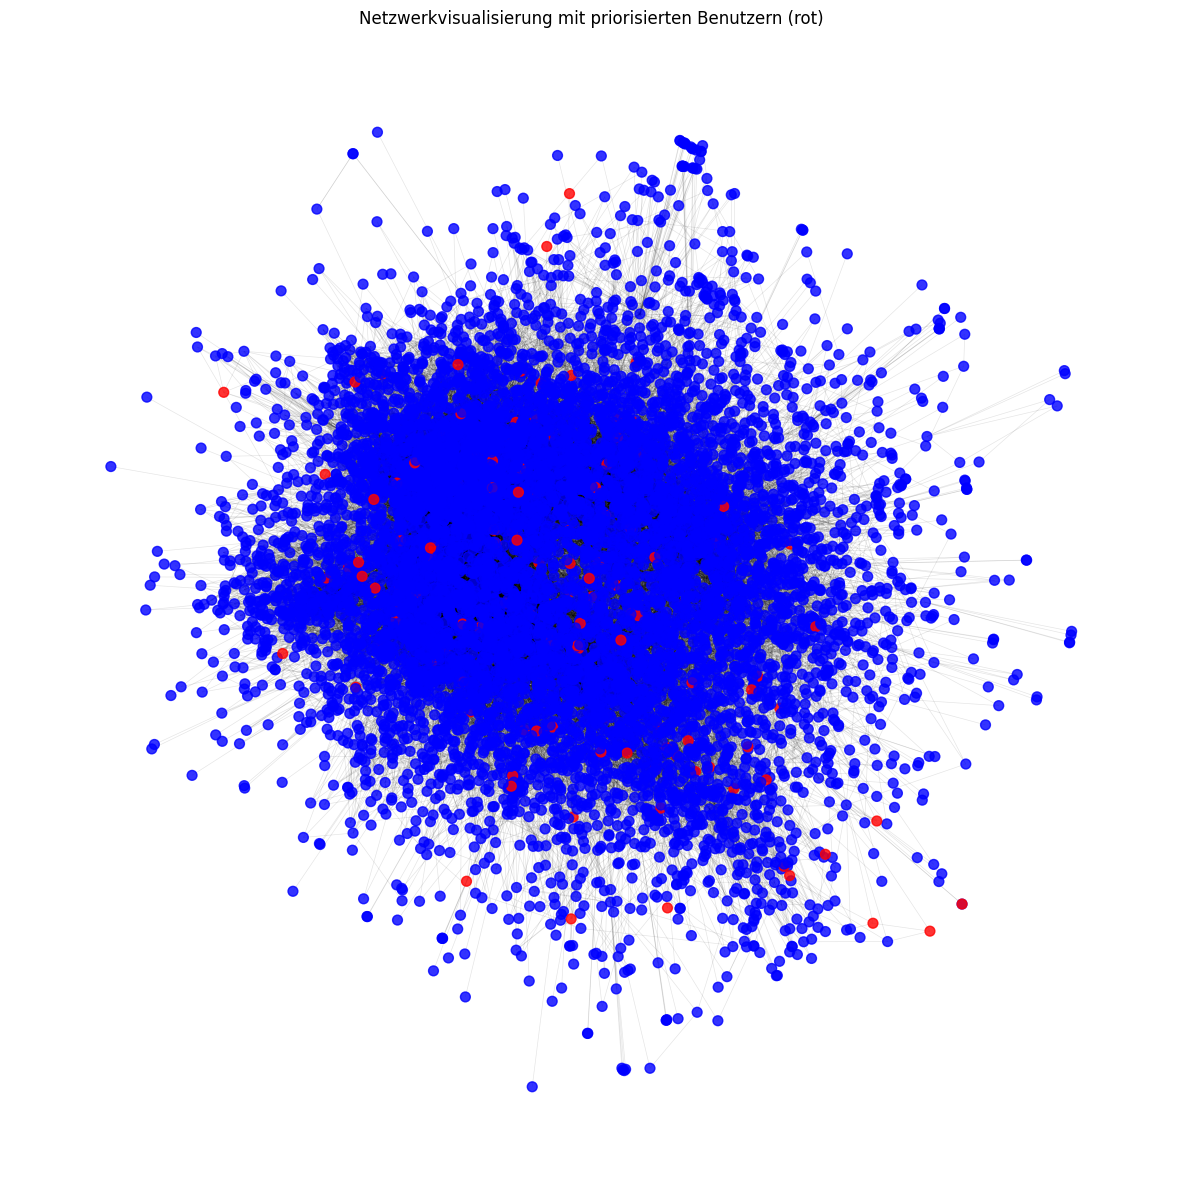

Ergebnisse gespeichert in 'selected_users.txt'


In [79]:
import numpy as np
import pandas as pd
import networkx as nx
import json
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Daten laden
friends_df = pd.read_csv('friends.csv', delimiter=',', header=None, dtype=int)
# Präferenzdaten laden
with open('preferences.json', 'r') as f:
    preferences_dict = json.load(f)
concerts = pd.read_csv('n_concerts.txt', delimiter=":", header=None, names=['Genre', 'Count'])

# Netzwerk erstellen
G = nx.Graph()
G.add_edges_from(friends_df.values)
A = nx.to_numpy_array(G)  # Adjazenzmatrix
D = np.diag(A.sum(axis=1))  # Gradmatrix
L = D - A  # Laplace-Matrix

# Spektral-Clustering
eigvals, eigvecs = eigh(L)
k = 10  # Anzahl Cluster
embedding = eigvecs[:, 1:k+1]  # Erste k nicht-triviale Eigenvektoren
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(embedding)

# Benutzer priorisieren
prioritized_users = []
for cluster_id in range(k):
    cluster_users = np.where(clusters == cluster_id)[0]
    cluster_degrees = A[cluster_users].sum(axis=1)  # Grad
    prioritized_cluster = sorted(zip(cluster_users, cluster_degrees), key=lambda x: -x[1])[:int(997 / k)]
    prioritized_users.extend([user[0] for user in prioritized_cluster])

# Ergebnisse speichern
with open("selected_users.txt", "w") as f:
    for user in prioritized_users:
        f.write(f"{user}\n")

# Netzwerk visualisieren
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)
node_colors = ["red" if node in prioritized_users else "blue" for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.1, width=0.5)
plt.title("Netzwerkvisualisierung mit priorisierten Benutzern (rot)")
plt.axis("off")
plt.show()

print(f"Ergebnisse gespeichert in 'selected_users.txt'")


Vecotr Space, Spectrum Clustering Laplace , Eigen Maps

Machine Learning Basics,
PCA
ICA
